Atalov S.

---
# Дерево решений

### Как с помощью линейных моделей разделить точки на 2 класса?

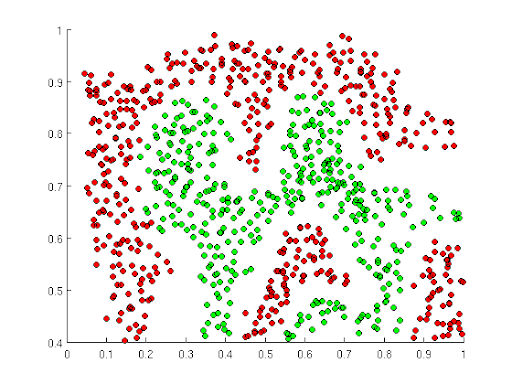

Рассмотрим простой пример классификации на примере Ирисок.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv', sep = ',')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris = df.copy()

In [4]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris['Species'] = iris['Species'].map({'Iris-setosa': 0,
                                      'Iris-versicolor': 1,
                                      'Iris-virginica': 2})

На графике каждая точка это один цветок и по оси Х - длина лепестка, по оси Y - ширина лепестка.

Как через условия (if-else) сделать правило для разделения цветков?

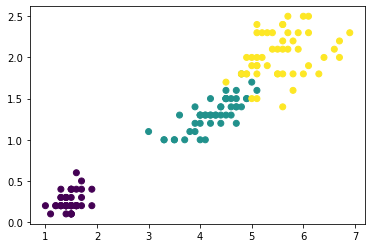

In [6]:
plt.scatter(x = iris['PetalLengthCm'], y = iris['PetalWidthCm'], c = iris['Species']);

if x1 < 2 and x2 < 1:
    print("Это первый класс")
else:
    if x1 < 5.5 and x2 < 1.75:
        print("Это второй класс")
    else:
        print("Это третий класс")

Попробуем построить дерево:

In [7]:
X = iris[['PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [9]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 99)

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [41]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [42]:
model.score(X_train, y_train)

1.0

In [43]:
model.score(X_test, y_test)

0.9333333333333333

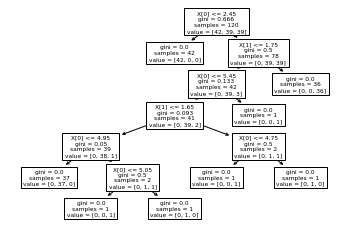

In [13]:
plot_tree(model);

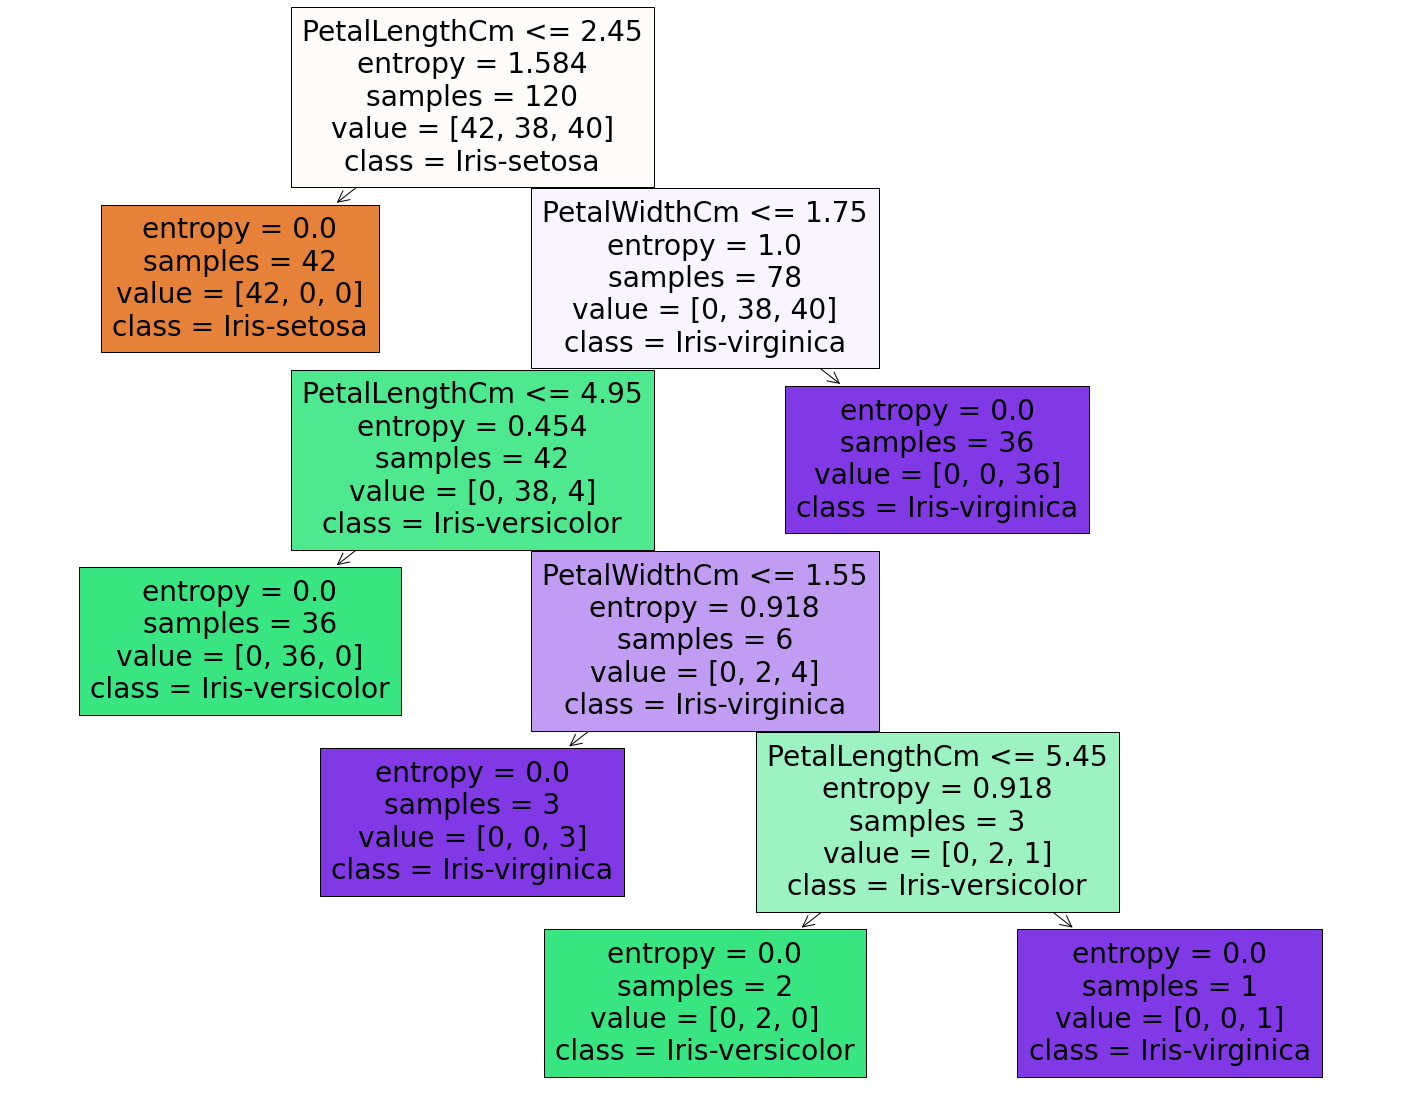

In [44]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, feature_names=['PetalLengthCm', 'PetalWidthCm'],
              class_names=df['Species'].unique(), filled=True)

## Энтропия?

<div>
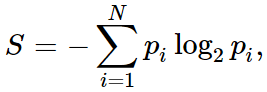
</div>

где $p_i$ это вероятность нахождения элемента в выборке.

Энтропия - это очень важное понятие, используемое в физике, теории информации и других областях. Энтропию можно описать как степень хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот.

In [45]:
df = pd.DataFrame({'X1': [1,1,1,0,0,0,0,1],
                   'X2': [0,0,0,1,0,0,0,1],
                   'Y': [1,1,1,1,0,0,0,0]})
df

,X1,X2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [46]:
X = df[['X1', 'X2']]
y = df['Y']

## Построить дерево и показать график:

In [47]:
model1 = DecisionTreeClassifier(criterion = "entropy")
model1.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

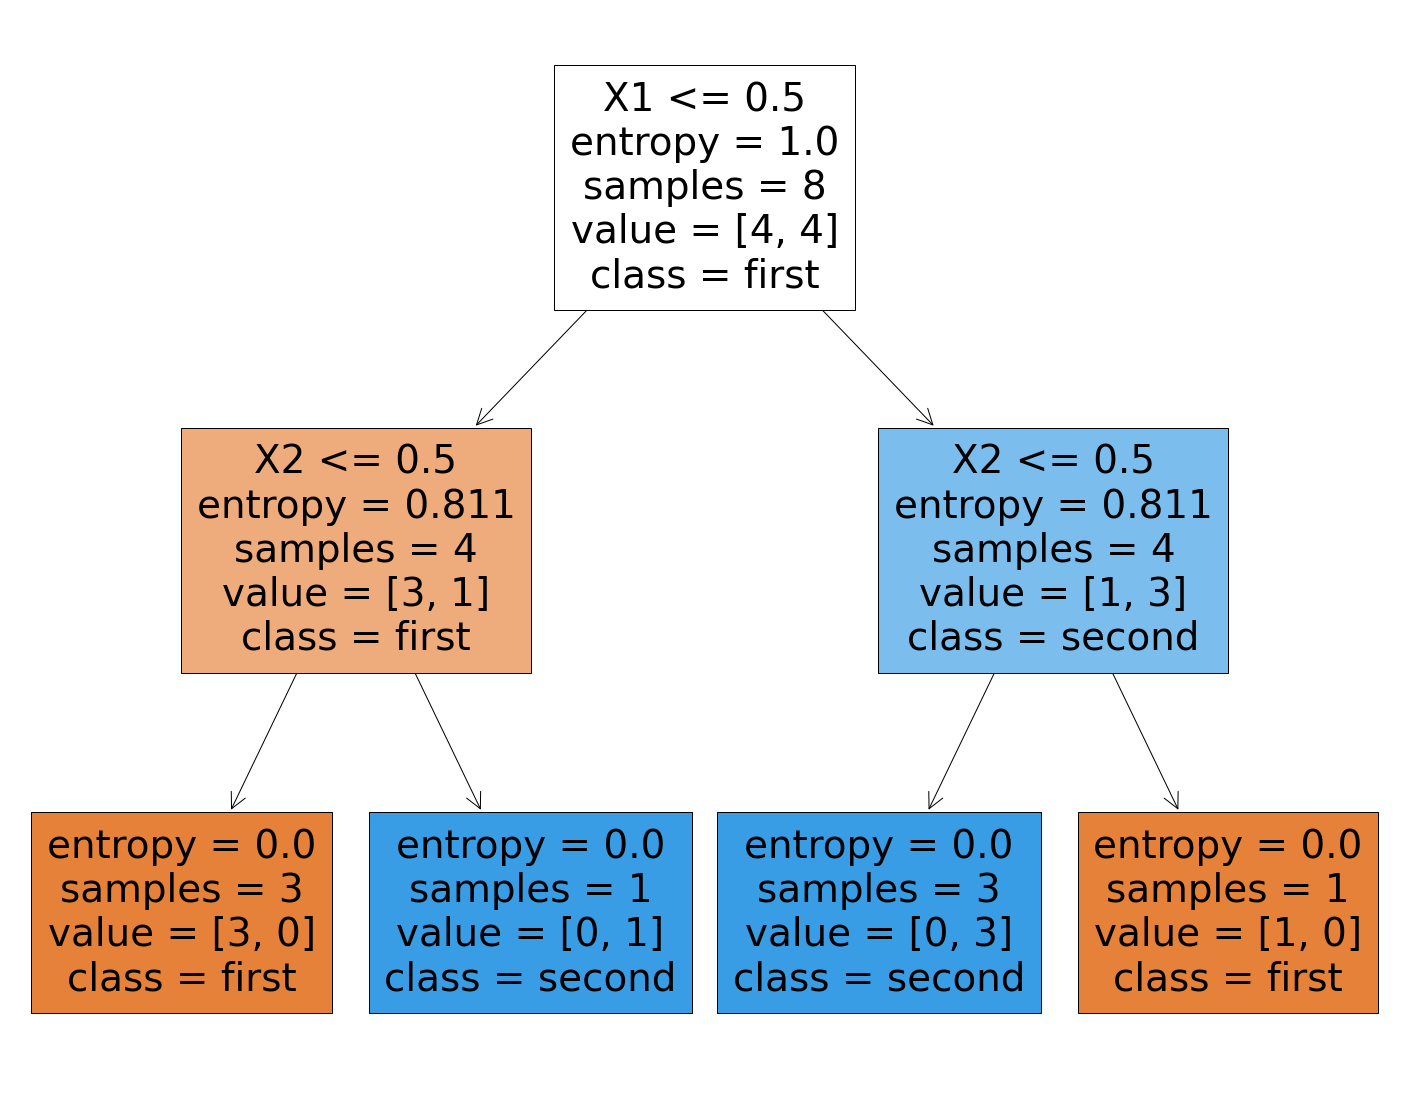

In [49]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model1, feature_names=['X1', 'X2'],
              class_names=['first','second'], filled=True)

## Загрузить данные `telecom_churn.xlsx` и попробовать построить дерево.

In [50]:
df = pd.read_excel('telecom_churn.xlsx')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [51]:
df.pop('State')
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [52]:
X = df.copy()
y = X.pop('Churn')

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [82]:
model.score(X_test, y_test)

0.9265367316341829

In [75]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8634658664666166

In [77]:
lr.score(X_test, y_test)

0.8530734632683659

In [95]:
model = DecisionTreeClassifier(max_depth = 7)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9752438109527382

In [96]:
print("Score of Tree on train:", model.score(X_train, y_train))
print("Score of Tree on test:", model.score(X_test, y_test))
print("Score of LogReg on train:", lr.score(X_train, y_train))
print("Score of LogReg on test:", lr.score(X_test, y_test))

Score of Tree on train: 0.9752438109527382
Score of Tree on test: 0.9400299850074962
Score of LogReg on train: 0.8634658664666166
Score of LogReg on test: 0.8500749625187406


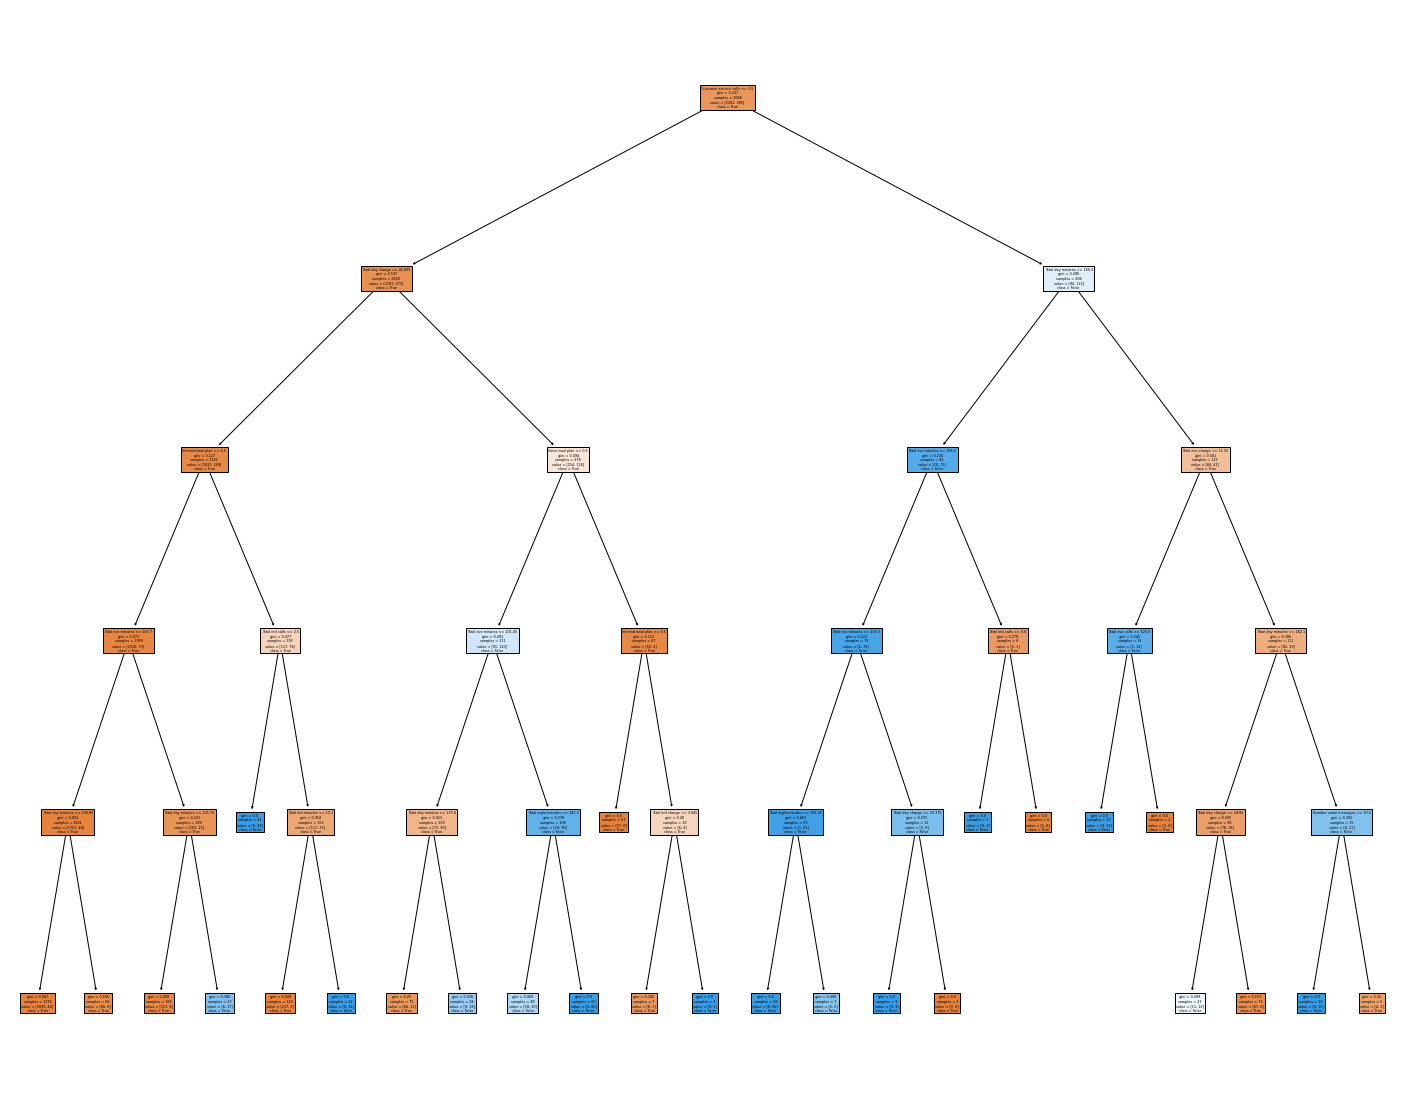

In [85]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, feature_names=X.columns,
              class_names=['True','False'], filled=True)